<a target="_blank" href="https://colab.research.google.com/github/ginal001/ML-2024-2025/blob/main/Lab11/Homework11.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Homework Assignment: Understanding Deconvolution in Autoencoders**
---------------

In class, we worked with autoencoders built from multilayer perceptrons (MLPs). However, encoders are often constructed using convolutional architectures to better capture spatial patterns. In this assignment, you'll explore how the decoder can use deconvolutional (transposed convolution) layers to reverse and mirror the operations performed by the convolutional encoder.

While convolutional encoders are relatively well understood, **decoding (or upsampling) the compressed representation** using **deconvolutional layers** (also known as **transposed convolutions**) often raises questions.

This assignment is particularly relevant because deconvolution is a core component of the U-Net architecture, a prominent neural network used extensively in image segmentation tasks.

Your main objective is to deeply understand **how transposed convolution layers work**, and explain them in both words and visuals.


## **The Objective**

Understand and clearly explain how **transposed convolutions** work. Use 2D transposed convolutions and a small grid of 2D points as a working example.

You may need to do some additional reading to complete this assignment.

## **Tasks & Deliverables**

### 1. **Theory Exploration**

Using markdown cells in your Colab notebook, answer the following:

- What is a **transposed convolution**?
- How does it differ from a regular convolution?
- How does it upsample feature maps?
- What are **stride**, **padding**, and **kernel size**, and how do they influence the result in a transposed convolution?
- To earn full two points, your explanation must be detailed enough for a reader to reproduce the upsampling process step by step.


### 2. **Manual Diagram (by your hand, not a generated image)**

Carefully plan and draw **by hand** a diagram or a set of diagrams that:

- Explain the process of using **transposed convolution**.
- Use an example of a **small input grid of 2D points** which gets expanded into a larger output grid.
- Explain how stride, padding, and the kernel shape affect the result.
- Show intermediate steps of the operation, not just input and output.

**Scan or photograph your diagram(s)**, and upload it to your **GitHub repository** for this course.

Then embed it in your Colab notebook using markdown (you can find examples on *how to do it* in previous notebooks related to this class, e.g. the one on linear regression or the one on the MLP network).


### 3. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

# Solution

**What is transposed convolution?**

Transposed convolution is a method of upsampling input. Despite the name, it's not a simple inverse of convolution, but rather a way to project a smaller input (e.g., a compressed representation) back into a larger spatial output by reversing the spatial reduction caused by a standard convolution.

**How does it differ from a regular convolution?**

A regular convolution takes a large input (like an image) and uses a filter (or kernel) to slide over it, computing dot products at each position to produce a smaller output. This operation typically reduces spatial dimensions. Transposed convolution works in opposite direction. It spreads values of input matrix over multiple outputs. To better understand that (and know why it is called *transposed*) it is worth to understand how we can write convolution as matrix multiplication. Let's do that step by step (for 2d matrices).
1. We have input matrix $X$ (d x d) and kernel $K$ (k x k).
2. Add padding.
3. Flatten the input matrix (still $X$) and create sparse matrix from kernel (still $K$) (which depends on stride).
4. Multiplicate $KX$ (let's call it $Y$).
5. Reshape $Y$.

And here we can see the difference: in transposed convolution we are doing that in reversed order.
1. We have input matrix $Y$ (n x n) and kernel $K$ (k x k).
2. Flatten the input matrix and create sparse matrix from kernel (which depends on stride).
3. Multiplicate $K^tY$ (let's call it $X'$).
4. Reshape $X'$.
5. Apply cropping.

Now, it is important to understand creating sparse matrix. We are going to proceed as it follows:
1. We have input matrix $X$ (d x d) and kernel $K$ (k x k).
2. Initialize matrix of zeros $K'$.
3. Each row of $K'$ represents the kernel applied at a specific position on the input. The non-zero entries in a row are the flattened values of the kernel, placed in positions corresponding to where the kernel overlaps with the input at that step.
4. If the stride \( s > 1 \), each row is spaced further apart in terms of index shifts — simulating the effect of the kernel skipping positions.

It is going to be more understandable if we look at the example.

There is also another explanation involving a moving kernel, but I prefer this one because it clearly shows where the name 'transposed' comes from.

**How does it upsample feature maps?**

We can see that from previous answer. We are taking transpose of convolution matrix which is going to result in upsampled matrix. We can think about it as spreading the values of input matrix.

**What are stride, padding, and kernel size, and how do they influence the result in a transposed convolution?**

**Stride**: number which indicates the size of step. It says how we move the kernel across the input matrix during the convolution operation. In terms of convolution matrix: it says how we move previous row.

**Kernel size**: number which indicates the spread of values. 

**Padding**: in transposed convolution, it affects the final cropping of the output. The transposed convolution matrix produces an output potentially larger than needed, so padding corresponds to removing extra values from the boundaries

## Example by hand

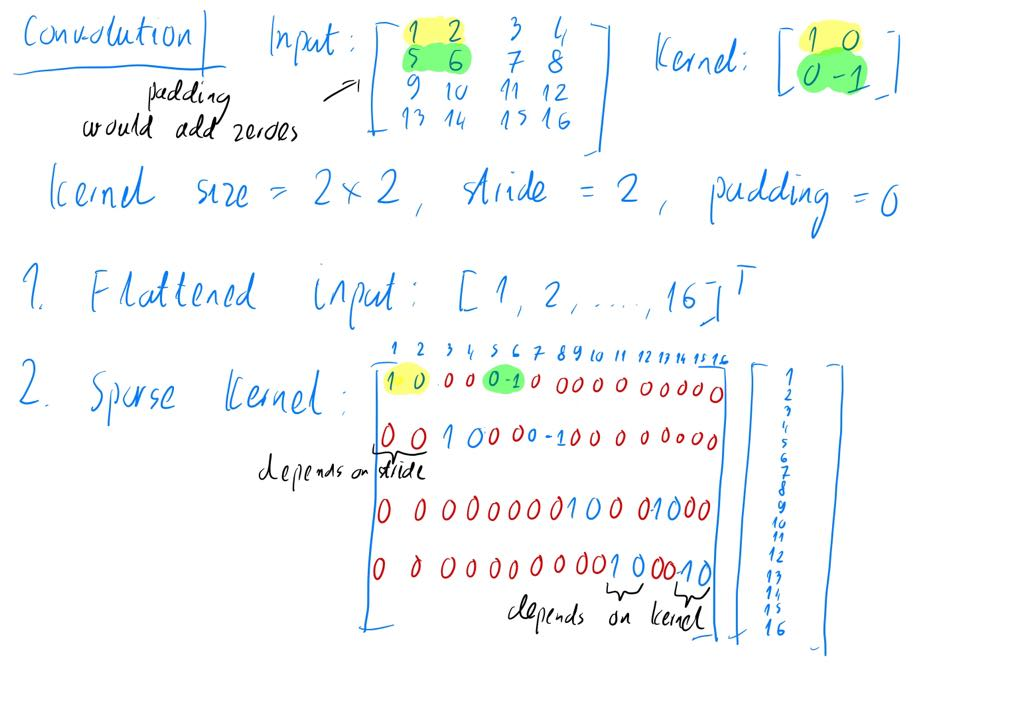

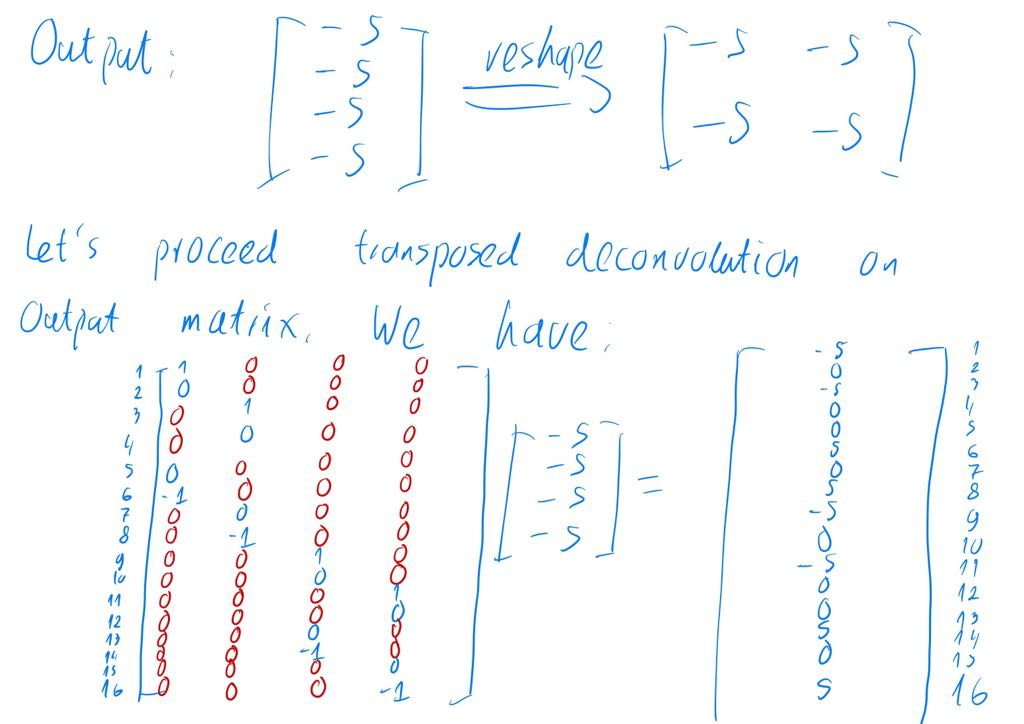

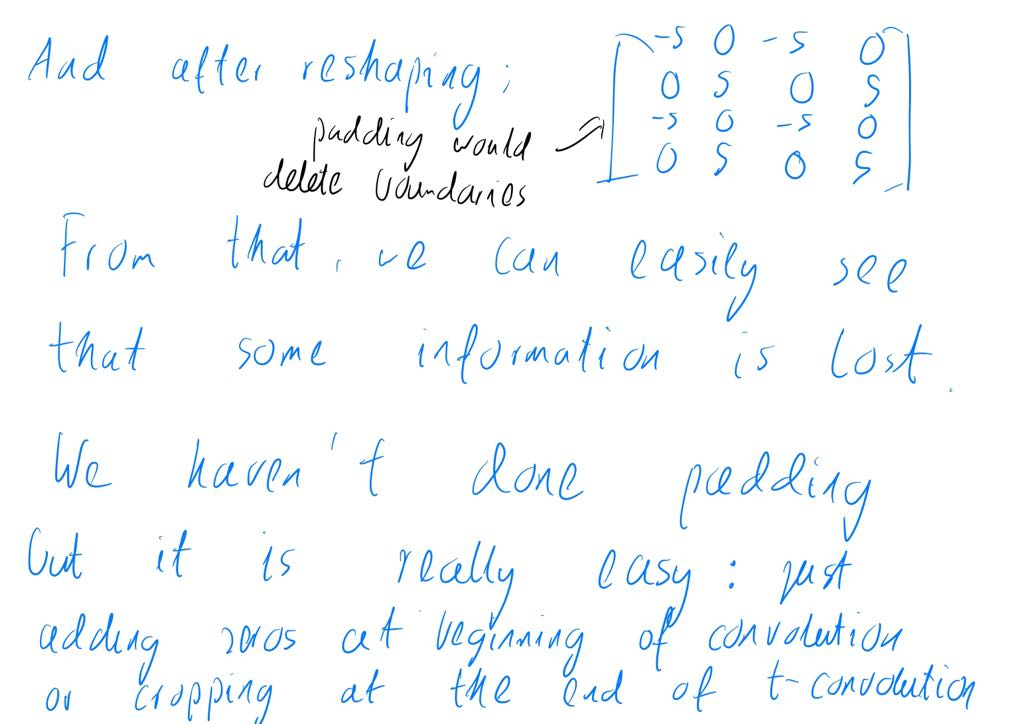